In [1]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')


In [3]:
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target=fish['Species'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
train_input ,test_input , train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [11]:
from sklearn.linear_model import SGDClassifier

In [17]:
sc =SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
sc.score(train_scaled,train_target),sc.score(test_scaled , test_target)

C:\Users\dowon ko\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(0.773109243697479, 0.775)

In [19]:
sc.partial_fit(train_scaled, train_target)
sc.score(train_scaled, train_target),sc.score(test_scaled, test_target)

(0.8151260504201681, 0.85)

코드를 보면 모델을 학습시킬때 train.test데이터를 한꺼번에 넣어서 훈련을 시켰다.
그러면 확률적 경사 하강법 아닌 미니 배치 경사하강법으로 오해할 수 있다.
하지만 확률적 경사하강법 함수안에는 데이터의 샘플을 하나씩 가지고 와서 훈련을 하는 알고리즘이 있다.

In [27]:
import numpy as np
sc =SGDClassifier(loss='log_loss',random_state=42)
train_score = []
test_score = []
classes= np.unique(train_target)

In [29]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled, test_target))

Text(0, 0.5, 'accuravy')

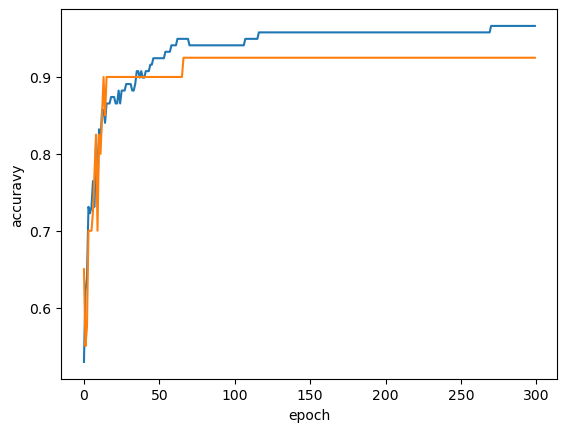

In [31]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuravy')

In [33]:
sc =SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
sc.score(train_scaled, train_target),sc.score(test_scaled, test_target)

(0.957983193277311, 0.925)

In [35]:
sc= SGDClassifier(loss='hinge', max_iter=100, tol=None , random_state=42)
sc.fit(train_scaled, train_target)
sc.score(train_scaled, train_target),sc.score(test_scaled, test_target)

(0.9495798319327731, 0.925)

경사하강법은 손실함수를 미분해서 가중치를 갱신하는 알고리즘이다.
손실함수는 최솟값을 구하기 위한것이기 때문에 손실함수의 최솟값을 구해야함 그러면 손실함수를 미분하여 0이 되게 하면 아닌가 생각할 수 있는데 대부분 손실함수는 비선형 함수이기 때문에 손실함수를 미분하여 가중치를 갱신하는 것이다.